In [60]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
import plotly.express as px

In [62]:
DATASET_PATH = 'train.csv'
df = pd.read_csv(DATASET_PATH)

In [63]:
DATASET_PATH = 'test.csv'
tf = pd.read_csv(DATASET_PATH)

In [64]:
def box_plot(i):
    plt.figure(figsize=(14, 6))
    sns.boxplot(df['Price'], df[i], palette='Set2')

    plt.xlabel('Price')
    plt.ylabel(i)
    plt.title('Distribution of median_house_value by ' + i);

In [65]:
def tf_median(col):
    tf[col].fillna(df[col].median(), inplace=True)

In [66]:
def df_median(col):
    df[col].fillna(df[col].median(), inplace=True)

In [67]:
def print_preds(true_values_train, pred_values_train):
    print('Train:\t' + 'R2(r2_score) = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          '\tMAE = ' + str(round(mean_absolute_error(true_values_train, pred_values_train), 3))
         )

In [68]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [69]:
tf.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [71]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [72]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [73]:
df.describe(include='object')

,Ecology_2,Ecology_3,Shops_2
count,10000,10000,10000
unique,2,2,2
top,B,B,B
freq,9903,9725,9175


In [74]:
tf.describe(include='object')

,Ecology_2,Ecology_3,Shops_2
count,5000,5000,5000
unique,2,2,2
top,B,B,B
freq,4952,4851,4588


**Обработка пропусков

In [75]:
tf_median('LifeSquare')
tf_median('Healthcare_1')

In [76]:
df_median('LifeSquare')
df_median('Healthcare_1')

In [77]:
# Удаление нереалистичных данных (год постройки больше 3000 или нереалистичная площадь)
df = df.loc[~df['Id'].isin([10814, 11607, 16550])]

In [78]:
df = df.drop(np.where((df.KitchenSquare >150) | (df.KitchenSquare < 0))[0])

In [79]:
selection1 = df[(df.Price >500000) & (df.Shops_2 == 'B')]['Id']
selection2 = df[(df.Price >500000) & (df.Ecology_2 == 'B')]['Id']
selection3 = df[(df.Price >500000) & (df.Ecology_3 == 'B')]['Id']
selection = pd.concat([selection1, selection2, selection3])
df = df.loc[~df['Id'].isin(selection.values)]

In [80]:
selection1 = df[(df.Price >330000) & (df.Shops_2 == 'A')]['Id']
selection2 = df[(df.Price >330000) & (df.Ecology_2 == 'A')]['Id']
selection3 = df[(df.Price >330000) & (df.Ecology_3 == 'A')]['Id']
selection = pd.concat([selection1, selection2, selection3])
df = df.loc[~df['Id'].isin(selection.values)]

**Построение новых признаков Train

In [81]:
df['Shops_2'].value_counts()

B    8977
A     791
Name: Shops_2, dtype: int64

In [82]:
df['Ecology_2'].value_counts()

B    9674
A      94
Name: Ecology_2, dtype: int64

In [83]:
df['Ecology_3'].value_counts()

B    9538
A     230
Name: Ecology_3, dtype: int64

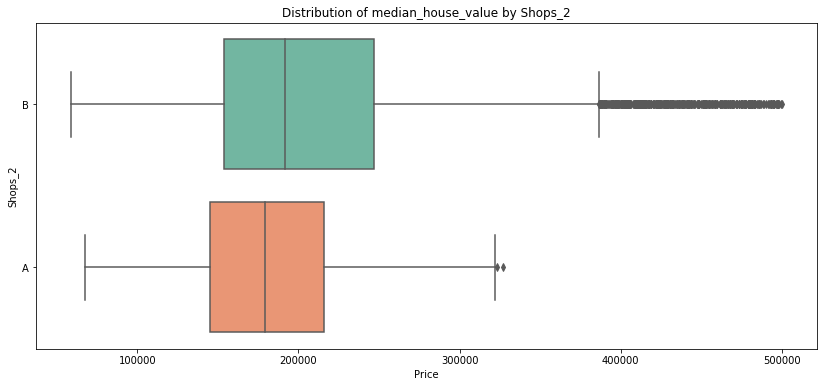

In [84]:
box_plot('Shops_2')
# 'Ecology_2', 'Ecology_3', 'Shops_2'

In [85]:
shops2_pr = pd.get_dummies(df['Shops_2'])
df[shops2_pr.columns] = shops2_pr
df.rename(columns={'A':'Shops2_A', 'B':'Shops2_B'}, inplace = True)

In [86]:
Ec2_pr = pd.get_dummies(df['Ecology_2'])
df[Ec2_pr.columns] = Ec2_pr
df.rename(columns={'A':'Ecology2_A', 'B':'Ecology2_B'}, inplace = True)

In [87]:
Ec3_pr = pd.get_dummies(df['Ecology_3'])
df[Ec3_pr.columns] = Ec3_pr
df.rename(columns={'A':'Ecology3_A', 'B':'Ecology3_B'}, inplace = True)

In [88]:
df = df.drop(['Ecology_2', 'Ecology_3', 'Shops_2'], axis=1)

In [89]:
df.corr()['Price']

Id               0.004747
DistrictId       0.253707
Rooms            0.539788
Square           0.477919
LifeSquare       0.302141
KitchenSquare    0.046915
Floor            0.131009
HouseFloor       0.083630
HouseYear        0.030055
Ecology_1       -0.056102
Social_1         0.280868
Social_2         0.258790
Social_3         0.049075
Healthcare_1     0.095050
Helthcare_2      0.231919
Shops_1          0.189541
Price            1.000000
Shops2_A        -0.085240
Shops2_B         0.085240
Ecology2_A      -0.024793
Ecology2_B       0.024793
Ecology3_A      -0.000573
Ecology3_B       0.000573
Name: Price, dtype: float64

**Построение новых признаков Test

In [90]:
tf['Shops_2'].value_counts()

B    4588
A     412
Name: Shops_2, dtype: int64

In [91]:
tf['Ecology_2'].value_counts()

B    4952
A      48
Name: Ecology_2, dtype: int64

In [92]:
tf['Ecology_3'].value_counts()

B    4851
A     149
Name: Ecology_3, dtype: int64

In [93]:
shops2_tr = pd.get_dummies(tf['Shops_2'])
tf[shops2_tr.columns] = shops2_tr
tf.rename(columns={'A':'Shops2_A', 'B':'Shops2_B'}, inplace = True)

In [94]:
Ec2_tr = pd.get_dummies(tf['Ecology_2'])
tf[Ec2_tr.columns] = Ec2_tr
tf.rename(columns={'A':'Ecology2_A', 'B':'Ecology2_B'}, inplace = True)

In [95]:
Ec3_tr = pd.get_dummies(tf['Ecology_3'])
tf[Ec3_tr.columns] = Ec3_tr
tf.rename(columns={'A':'Ecology3_A', 'B':'Ecology3_B'}, inplace = True)

In [96]:
tf = tf.drop(['Ecology_2', 'Ecology_3', 'Shops_2'], axis=1)

**Log-трансформация и стандартизация признаков

**Логарифмирование признаков с асимметричным распределением

In [97]:
feature_names = [col for col in df.columns if col not in ['Id', 'Price']]
target_name = ['Price']

In [98]:
y = pd.DataFrame(df, columns=["Price"])

In [99]:
X = df.drop(['Price', 'Id'], axis = 1)
XT = tf.drop(['Id'], axis = 1)

In [100]:
feature_skewed_names = ['Square', 'HouseYear', 'Social_2', 'LifeSquare']
feature_log_names = []
for f in feature_skewed_names:
    X[f + '_log'] = np.log(X[f])
    XT[f + '_log'] = np.log(XT[f])
    feature_log_names.append(f + '_log')

In [101]:
X[feature_log_names].head()

,Square_log,HouseYear_log,Social_2_log,LifeSquare_log
0,3.870817,7.585281,8.984192,3.382448
1,4.184850,7.589842,9.240773,3.690117
2,3.805505,7.584773,8.956609,3.374087
3,3.976930,7.589336,8.654343,3.965213
4,3.680071,7.588830,8.661467,3.168684


In [102]:
feature_names = [col for col in X.columns if col not in ['Id', 'Price']]
#feature_names

In [103]:
# отберем признаки для стандартизации
feature_bin_names = X[feature_names].select_dtypes(include='uint8').columns.tolist()
#feature_bin_names

In [104]:
feature_num_names = list(set(feature_names) - set(feature_skewed_names))
#feature_num_names

In [105]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X[feature_num_names]),
                              columns=feature_num_names, index=X.index)
XT_scaled = pd.DataFrame(scaler.transform(XT[feature_num_names]),
                             columns=feature_num_names, index=XT.index)

In [106]:
#XT_scaled.info()

**Графики

In [107]:
target_mean = round(df['Price'].mean(), 2)
target_median = df['Price'].median()
target_mode = df['Price'].mode()[0]

target_mean, target_median, target_mode

(207481.47, 190210.17082616617, 59174.77802758122)

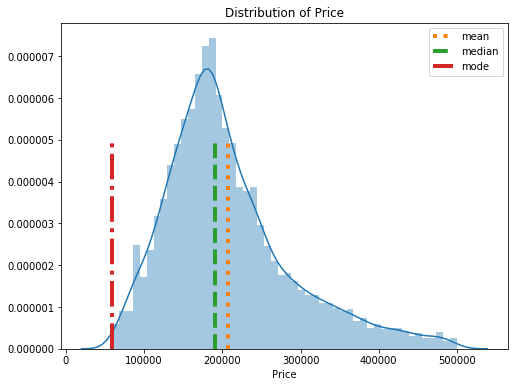

In [108]:
plt.figure(figsize = (8, 6))

sns.distplot(df['Price'])

yp = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, yp, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, yp, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, yp, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Price')
plt.legend();

In [109]:
px.histogram(df, x='Price')

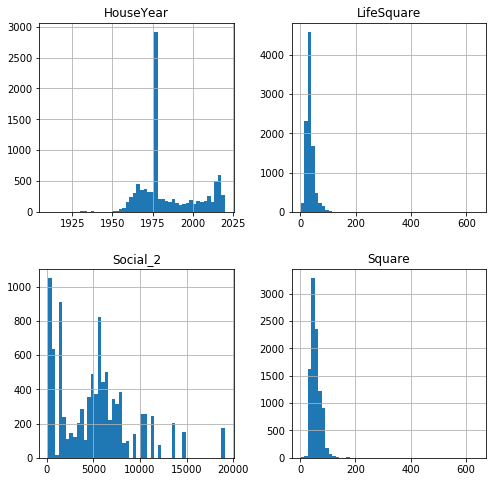

In [110]:
df[feature_skewed_names].hist(figsize=(8,8), bins=50, grid=True);

**Модель Random Forest**

In [111]:
X = X_scaled.copy()
XT = XT_scaled.copy()

In [112]:
model = RandomForestRegressor(n_estimators = 1000, max_depth = 24, random_state = 42)
model.fit(X, y.values[:, 0])

RandomForestRegressor(max_depth=24, n_estimators=1000, random_state=42)

In [113]:
yf_pred = model.predict(X)
yf_pred.shape

(9768,)

In [114]:
print_preds(y, yf_pred)

Train:	R2(r2_score) = 0.962	MAE = 9694.375


In [115]:
kf = KFold(n_splits=3, random_state=42, shuffle=True)
cv_scores = cross_val_score(model, X, y, scoring='r2', n_jobs=-1)
print('R2(cross_val_score) = ', round(cv_scores.mean(), 3))

R2(cross_val_score) =  0.719


In [116]:
yt_pred = model.predict(XT)
yt_pred.shape

(5000,)

In [117]:
yt_pred = pd.DataFrame(yt_pred, columns = ['Price'], index = tf['Id'])

In [118]:
yt_pred.to_csv('Avoronkov_predictions.csv', encoding='utf-8')